So now that our data is cleaned, let's enjoy the best part, the analysis!

The questions I want to awnser are:

1. What is the most reacted post?
2. What is the most commented post?
3. What is the most shared post?
4. What is the most saved post?
5. What is the total number of saves that our Instagram has?
6. In which posts do we reach more users?
7. In how many days were there any posts made?
8. How many posts?
9. What is the total number of users reached on our Instagram?
10. What is the most shared post format?
11. The post about the IME Jr federation performed better on Instagram or LinkedIn?
12. What is the average number of likes on Instagram? And on LinkedIn?
13. Are there any posts with weird data? What happened there?
14. Which month had the most reactions?
15. How many and which posts had more than 15 comments?
16. How many feed posts have no comments? And how many stories?
17. How many feed posts do we have on Instagram since 10/29/2021?
18. How many times was each post viewed per user? What is the most viewed post by user?
19. Which post has the best reaction performance?
20. Which day(s) of the week do we have the most reactions?
21. How many impressions did posts with the DiaDoDesafio creative have?
22. Posts that have more likes have more comments too?
23. Create a grade column for each post. The calculation of the grade is up to you.
24. How many people liked our post by Isabelle Tamarozi? Was it a good post?
25. What is the name of our best story? 
26. What is the name of our best post? 
27. There was an improvement or worsening of performance after the new visual identity? What hypotheses do you raise for this?
28. Do we lose a lot of engagement with sequential posts?******
29. Which post should we repeat?
30. Which format should we prioritize?
31. How posts involving calendar special days compare to other kinds of posts?
32. As a decision maker, what would be your strategies for the Marketing team?

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [203]:
df=pd.read_csv('cleaned_df.csv')
df.head()

,Unnamed: 0,post_name,date,creative,positioning,platform,format,reach,impressions,saves,link_clicks,3-Sec-View,100%_visualized,comments,reactions,shares
0,1,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,stories,Instagram,imagem,116.0,119.0,0.0,0.0,0.0,0.0,0,0.0,1.0
1,2,BingoDoEstudante_Vídeo_Stories_Instagram_110821,2021-08-11,BingoDoEstudante,stories,Instagram,video,93.0,93.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,3,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,stories,Instagram,imagem,75.0,75.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,4,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),stories,Instagram,imagem,84.0,88.0,0.0,0.0,0.0,0.0,1,1.0,1.0
4,5,CuriosidadesArcane(2)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(2),stories,Instagram,imagem,78.0,79.0,0.0,0.0,0.0,0.0,1,1.0,0.0


In [204]:
df.date=df.date.astype('datetime64[ns]')

In [205]:
#Let me remove the first column that is an error
df.drop(columns=['Unnamed: 0'],inplace=True)

In [206]:
df.head()

,post_name,date,creative,positioning,platform,format,reach,impressions,saves,link_clicks,3-Sec-View,100%_visualized,comments,reactions,shares
0,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,stories,Instagram,imagem,116.0,119.0,0.0,0.0,0.0,0.0,0,0.0,1.0
1,BingoDoEstudante_Vídeo_Stories_Instagram_110821,2021-08-11,BingoDoEstudante,stories,Instagram,video,93.0,93.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,stories,Instagram,imagem,75.0,75.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),stories,Instagram,imagem,84.0,88.0,0.0,0.0,0.0,0.0,1,1.0,1.0
4,CuriosidadesArcane(2)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(2),stories,Instagram,imagem,78.0,79.0,0.0,0.0,0.0,0.0,1,1.0,0.0


In [207]:
#Question 1,2, 3 and 4: 'What is the most reacted post?', '...the most commented?' '...the most shared?' and '...the most saved?'
lst=['reactions','comments','shares','saves']
for i in lst:
    print(f'The post with more {i} is {df.post_name[df[i]==df[i].max()].values[0]}, with {df[i].max()} comments')

The post with more reactions is NúcleoEstatística_Imagem_Feed_LinkedIn_140721, with 1899.0 comments
The post with more comments is SorteioValePresente_Imagem_Feed_Instagram_291021, with 369 comments
The post with more shares is SemanaPreFuvest_Imagem_Feed_Instagram_060121, with 200.0 comments
The post with more saves is SemanaPreFuvest_Imagem_Feed_Instagram_060121, with 81.0 comments


In [208]:
#5. What is the total number of saves that the Instagram has?
df.saves.sum()
#This is very few, considering that we have 229 posts(question 8).

246.16157205240177

In [209]:
#6. In which posts do we reach more users?
df.nlargest(10,'reach')
# I selected the top 10 more reached posts.

,post_name,date,creative,positioning,platform,format,reach,impressions,saves,link_clicks,3-Sec-View,100%_visualized,comments,reactions,shares
213,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2021-01-06,SemanaPreFuvest,feed,Instagram,imagem,6058.0,8849.0,81.0,0.0,0.0,0.0,25,0.0,200.0
198,ReelsAlissa_Vídeo_Reels_Instagram_211121,2022-01-31,ReelsAlissa,Reels,Instagram,video,3113.0,3374.0,11.0,0.0,0.0,0.0,22,112.0,0.0
199,Retrospectiva _Vídeo_Reels_Instagram_311221,2021-12-31,Retrospectiva,Reels,Instagram,video,1173.0,1280.0,8.0,0.0,0.0,0.0,14,43.0,14.0
149,DiaMusicistas_Imagem_Reels_Instagram_221121,2021-11-22,DiaMusicistas,Reels,Instagram,imagem,838.0,849.0,7.0,0.0,0.0,0.0,79,79.0,0.0
158,FotoConfraternização_Imagem_Feed_Instagram_211221,2021-12-21,FotoConfraternização,feed,Instagram,imagem,838.0,945.0,8.0,0.0,0.0,0.0,23,119.0,19.0
196,ProcessoSeletivo_Imagem_Feed_Instagram_060921,2021-09-06,ProcessoSeletivo,feed,Instagram,imagem,697.0,761.0,2.0,0.0,0.0,0.0,8,42.0,1.0
182,NovaGestão_Imagem_Feed_Instagram_141221,2021-12-14,NovaGestão,feed,Instagram,imagem,638.0,823.0,7.0,0.0,0.0,0.0,32,90.0,12.0
131,DiaDoEstatístico_Imagem_Feed_LinkedIn_290521,2021-05-29,DiaDoEstatístico,feed,Linkedin,imagem,610.0,610.0,0.0,27.0,0.0,0.0,1,28.0,1.0
170,IMEJrFederada_Imagem_Feed_Instagram_090921,2021-09-09,IMEJrFederada,feed,Instagram,imagem,599.0,669.0,2.0,0.0,0.0,0.0,8,53.0,0.0
159,FraseEstatistica_Imagem_Feed_Instagram_281221,2021-12-28,FraseEstatistica,feed,Instagram,imagem,556.0,620.0,13.0,0.0,0.0,0.0,1,71.0,11.0


In [210]:
#7. In how many days were there any posts made?
len(df.date.unique())

89

In [211]:
#8. How many posts?
df.post_name.count()

229

In [212]:
#9. What is the total number of users reached on Instagram?
# We cannot just sum all the posts' reach because people may see more than one post.
# We can assume that posts are that mostly viwed by subscribed people because the posts' reach is smaller than the subscribed
#total people. Thus, let's assume that 20% of a new post reaches are form new people. 
#So we will sum the reach of the first post with 20% of the others.
(df[df.date==df.date.min()].reach+df.reach.head(228).sum()*0.2).values[0]

9951.0

In [213]:
#10. What is the most shared post format?
kk=df[df.format=='video'].shares.mean()
ll=df[df.format=='imagem'].shares.mean()
print(f' Videos have {int(kk)} shares on avareve and images have {int(ll)}.')
#It is remarcable how little the posts are shared.

 Videos have 0 shares on avareve and images have 2.


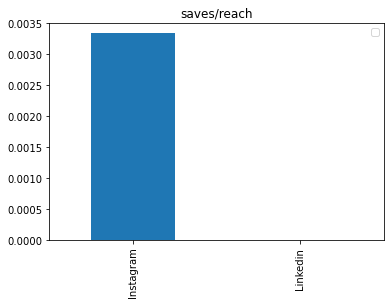

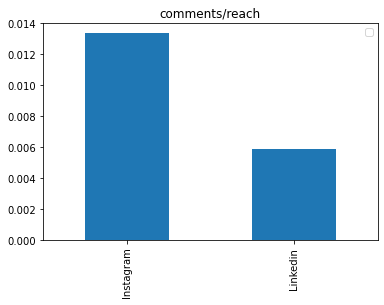

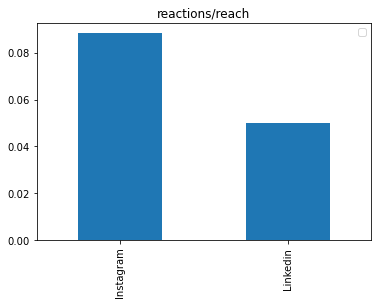

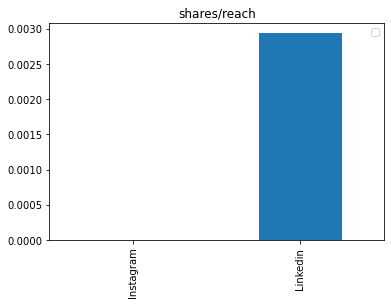

As we can see, the instagram posts have better results in almost every metric.


In [214]:
#11. The post about the IME Jr federation performed better on Instagram or LinkedIn?
#The organization has a much greater number of followers on instagram.
#To make things fair, I divided the various metrics by the reach, the number of people that saw the post.
#We will compare the shares, saves, comments and reactions of the posts in the two plataforms.
OnFederation=df[df.creative=='IMEJrFederada'].copy()
OnFederation.index=['Instagram','Linkedin']
lst=['saves','comments','reactions','shares']
for i in lst:
    plt.title(f'{i}/reach')
    plt.legend(('instagram','linkedin'))
    (OnFederation[i]/OnFederation['reach']).T.plot.bar()
    plt.show()
print('As we can see, the instagram posts have better results in almost every metric.')

In [215]:
#12. What is the average number of likes on Instagram? And on LinkedIn?
a=df[df.platform=='Instagram'].reactions.mean()
b=df[df.platform=='Linkedin'].reactions.mean()
print(f' The mean reactions number on Instagram is {a} and the mean reactions number on Linkedin is {b}.')

 The mean reactions number on Instagram is 15.600215176254668 and the mean reactions number on Linkedin is 98.54545454545455.


13. Are there any posts with weird data? What happened?

I solved this problem in the end of the data cleaning notebook.

In [216]:
#14. Which month had the most reactions?
a=df.copy()
a.date=a.date.dt.month
reacbym=a.groupby(by='date').reactions.sum()
print(f'The reactions by month are as follows:\n {reacbym}')
#Yep, there are months without posts.

The reactions by month are as follows:
 date
1      260.000000
5      422.000000
6      211.000000
7     3049.244541
8      125.000000
9      375.000000
10     386.000000
11     200.000000
12     369.000000
Name: reactions, dtype: float64


In [217]:
#15. How many and which posts had more than 15 comments?
print(df[df.comments>14].post_name)
print(f'So we have {len(df[df.comments>14])} posts with more than 15 comments.')

103            DiaDaFamília_Imagem_Feed_Instagram_150521
134          DiaDoProfessor_Imagem_Feed_Instagram_151021
147    DiaMundialEstatística_Imagem_Feed_Instagram_20...
149          DiaMusicistas_Imagem_Reels_Instagram_221121
158    FotoConfraternização_Imagem_Feed_Instagram_211221
182              NovaGestão_Imagem_Feed_Instagram_141221
198             ReelsAlissa_Vídeo_Reels_Instagram_211121
213         SemanaPreFuvest_Imagem_Feed_Instagram_060121
216     SorteioValePresente_Imagem_Feed_Instagram_291021
Name: post_name, dtype: object
So we have 9 posts with more than 15 comments.


In [218]:
#16. How many feed posts have no comments? And how many stories?
kk=len(df[(df.comments==0) & (df.positioning=='feed')])
ll=len(df[(df.comments==0) & (df.positioning=='stories')])
print(f'There are {kk} posts on the feed with no comments and there are {ll} on stories.')

There are 24 posts on the feed with no comments and there are 140 on stories.


In [219]:
#17. How many feed posts do we have on Instagram since 10/29/2021?
len(df[(df.date>pd.to_datetime('29/10/2021',format='%d/%m/%Y')) & (df.date<pd.to_datetime('31/01/2022',format='%d/%m/%Y'))])
#I set all wrong future dates to 31/01/2022, so we should not consider these.

47

In [220]:
#18. How many times was each post viewed per user? What is the most viewed post by user?
#To awnser this, we basically have to see how many impressions a post has compared to the reach. 
a=pd.DataFrame({'name':df.post_name, 'rewatches': df.impressions/df.reach}, index=np.arange(229)) 
a

,name,rewatches
0,AulõesFuvest_Imagem_Stories_Instagram_201221,1.025862
1,BingoDoEstudante_Vídeo_Stories_Instagram_110821,1.000000
2,BoaProvaFuvest_Imagem_Stories_Instagram_111221,1.000000
3,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,1.047619
4,CuriosidadesArcane(2)_Imagem_Stories_Instagram...,1.012821
...,...,...
224,Vale-PresenteResultado(5)_Vídeo_Stories_Instag...,1.011494
225,Vale-PresenteResultado(6)_Imagem_Stories_Insta...,1.011236
226,VoltasAulasUSP_Vídeo_Stories_Instagram_160821,1.000000
227,XadrezNoIME(1)_Imagem_Feed_LinkedIn_300721,1.000000


In [221]:
print(f'The most rewatched post was {a.name[a.rewatches==a.rewatches.max()].values}')

The most rewatched post was ['DiaDoAmigo(2)_Vídeo_Stories_Instagram_200721']


In [222]:
#19. Which post has the best reaction performance?
df[df.reactions==df.reactions.max()]

,post_name,date,creative,positioning,platform,format,reach,impressions,saves,link_clicks,3-Sec-View,100%_visualized,comments,reactions,shares
187,NúcleoEstatística_Imagem_Feed_LinkedIn_140721,2021-07-14,NúcleoEstatística,feed,Linkedin,imagem,271.0,271.0,0.0,15.0,0.0,0.0,0,1899.0,0.0


In [223]:
#20. Which day(s) of the week do we have the most reactions?
dfcopy=df.copy()
dfcopy['dayofweek']=df.date.dt.dayofweek
dfcopy

,post_name,date,creative,positioning,platform,format,reach,impressions,saves,link_clicks,3-Sec-View,100%_visualized,comments,reactions,shares,dayofweek
0,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,stories,Instagram,imagem,116.0,119.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0
1,BingoDoEstudante_Vídeo_Stories_Instagram_110821,2021-08-11,BingoDoEstudante,stories,Instagram,video,93.0,93.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2
2,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,stories,Instagram,imagem,75.0,75.0,0.0,0.0,0.0,0.0,0,0.0,0.0,5
3,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),stories,Instagram,imagem,84.0,88.0,0.0,0.0,0.0,0.0,1,1.0,1.0,4
4,CuriosidadesArcane(2)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(2),stories,Instagram,imagem,78.0,79.0,0.0,0.0,0.0,0.0,1,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Vale-PresenteResultado(5)_Vídeo_Stories_Instag...,2021-11-11,Vale-PresenteResultado(5),stories,Instagram,video,87.0,88.0,0.0,0.0,0.0,0.0,1,1.0,0.0,3
225,Vale-PresenteResultado(6)_Imagem_Stories_Insta...,2021-11-11,Vale-PresenteResultado(6),stories,Instagram,imagem,89.0,90.0,0.0,0.0,0.0,0.0,2,2.0,1.0,3
226,VoltasAulasUSP_Vídeo_Stories_Instagram_160821,2021-08-16,VoltasAulasUSP,stories,Instagram,video,49.0,49.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0
227,XadrezNoIME(1)_Imagem_Feed_LinkedIn_300721,2021-07-30,XadrezNoIME(1),feed,Linkedin,imagem,348.0,348.0,0.0,79.0,0.0,0.0,0,18.0,0.0,4


In [224]:
#20.1
a=dfcopy.groupby(by='dayofweek').reactions.mean()
#2021-12-20 was a 0 and was a Monday, so we can set the weekdays accordingly.
a.index=['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
a

Monday       17.078947
Tuesday      16.629630
Wednesday    94.482759
Thursday     10.000000
Friday        6.271186
Saturday     19.577251
Sunday       12.454545
Name: reactions, dtype: float64

In [225]:
#21. How many impressions did posts with the DiaDoDesafio creative have?
#There are multiple creatives called DiaDoDesafio, so we will sum their reactions.
df[df.creative.str.contains('DiaDoDesafio')].impressions.sum()

1443.0

In [226]:
#22. Posts that have more likes have more comments too?

#To awnser this we will make a Pearson statistical correlation test, where numbers close to 1 mean
#an strong relation where one variable grows with the other, numbers close to 0 mean no correlation
#and numbers close to -1 mean that one variable decreases with growth of the other. 
a=df.corr('pearson')
a

,reach,impressions,saves,link_clicks,3-Sec-View,100%_visualized,comments,reactions,shares
reach,1.000000,0.989068,0.897882,0.056562,NaN,NaN,0.172395,0.068309,0.780391
impressions,0.989068,1.000000,0.929086,0.028471,NaN,NaN,0.155514,0.054023,0.823356
saves,0.897882,0.929086,1.000000,-0.046234,NaN,NaN,0.246395,0.038916,0.833928
link_clicks,0.056562,0.028471,-0.046234,1.000000,NaN,NaN,-0.032548,0.055738,-0.027990
3-Sec-View,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100%_visualized,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
comments,0.172395,0.155514,0.246395,-0.032548,NaN,NaN,1.000000,0.056365,0.112194
reactions,0.068309,0.054023,0.038916,0.055738,NaN,NaN,0.056365,1.000000,0.011268
shares,0.780391,0.823356,0.833928,-0.027990,NaN,NaN,0.112194,0.011268,1.000000


In [227]:
#22.2
b=a.loc['reactions','comments']
print(f' As we can see, comments and reactions have a correlation of {b}, which is very weak. \n Likes are one type of reaction, so we can conclude that posts with more likes do not necesseraly have more comments.')

 As we can see, comments and reactions have a correlation of 0.05636540034248431, which is very weak. 
 Likes are one type of reaction, so we can conclude that posts with more likes do not necesseraly have more comments.


In [228]:
#23. Create a grade column for each post. The calculation of the grade is up to you.
# I believe the most important thing in a post is to reach many people
# then have interactions in the following order: shares, comments, saves and reactions.
# I will give the following weights to the metrics:
# reach:5 shares:3 comments:2 saves:2 reactions:1
# Then I will divide the result by 100 just to have a nicer number to compare.
# In the next questions, if you wonder why a post is considered good, know that the awnser is:
# 'It had a relative good amount of reaches, shares, comments, saves and reactions.'
df['grade']=pd.Series((df.reach*5+df.shares*3+df.comments*2+df.saves*2+df.reactions)/100)
df

,post_name,date,creative,positioning,platform,format,reach,impressions,saves,link_clicks,3-Sec-View,100%_visualized,comments,reactions,shares,grade
0,AulõesFuvest_Imagem_Stories_Instagram_201221,2021-12-20,AulõesFuvest,stories,Instagram,imagem,116.0,119.0,0.0,0.0,0.0,0.0,0,0.0,1.0,5.83
1,BingoDoEstudante_Vídeo_Stories_Instagram_110821,2021-08-11,BingoDoEstudante,stories,Instagram,video,93.0,93.0,0.0,0.0,0.0,0.0,0,0.0,0.0,4.65
2,BoaProvaFuvest_Imagem_Stories_Instagram_111221,2021-12-11,BoaProvaFuvest,stories,Instagram,imagem,75.0,75.0,0.0,0.0,0.0,0.0,0,0.0,0.0,3.75
3,CuriosidadesArcane(1)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(1),stories,Instagram,imagem,84.0,88.0,0.0,0.0,0.0,0.0,1,1.0,1.0,4.26
4,CuriosidadesArcane(2)_Imagem_Stories_Instagram...,2021-12-03,CuriosidadesArcane(2),stories,Instagram,imagem,78.0,79.0,0.0,0.0,0.0,0.0,1,1.0,0.0,3.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Vale-PresenteResultado(5)_Vídeo_Stories_Instag...,2021-11-11,Vale-PresenteResultado(5),stories,Instagram,video,87.0,88.0,0.0,0.0,0.0,0.0,1,1.0,0.0,4.38
225,Vale-PresenteResultado(6)_Imagem_Stories_Insta...,2021-11-11,Vale-PresenteResultado(6),stories,Instagram,imagem,89.0,90.0,0.0,0.0,0.0,0.0,2,2.0,1.0,4.54
226,VoltasAulasUSP_Vídeo_Stories_Instagram_160821,2021-08-16,VoltasAulasUSP,stories,Instagram,video,49.0,49.0,0.0,0.0,0.0,0.0,1,0.0,0.0,2.47
227,XadrezNoIME(1)_Imagem_Feed_LinkedIn_300721,2021-07-30,XadrezNoIME(1),feed,Linkedin,imagem,348.0,348.0,0.0,79.0,0.0,0.0,0,18.0,0.0,17.58


In [229]:
#Let's see how this grade new variable metrics are.
df.grade.describe()

count    229.000000
mean      11.011553
std       23.705967
min        0.000000
25%        4.350000
50%        5.650000
75%       11.680000
max      311.020000
Name: grade, dtype: float64

In [230]:
#Let's create a new column with the ranking using the grade.
df['ranking']=df.grade.rank(method='max',ascending=False)
df.sort_values('ranking')

,post_name,date,creative,positioning,platform,format,reach,impressions,saves,link_clicks,3-Sec-View,100%_visualized,comments,reactions,shares,grade,ranking
213,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2021-01-06,SemanaPreFuvest,feed,Instagram,imagem,6058.0,8849.0,81.0,0.0,0.0,0.0,25,0.0,200.0,311.02,1.0
198,ReelsAlissa_Vídeo_Reels_Instagram_211121,2022-01-31,ReelsAlissa,Reels,Instagram,video,3113.0,3374.0,11.0,0.0,0.0,0.0,22,112.0,0.0,157.43,2.0
199,Retrospectiva _Vídeo_Reels_Instagram_311221,2021-12-31,Retrospectiva,Reels,Instagram,video,1173.0,1280.0,8.0,0.0,0.0,0.0,14,43.0,14.0,59.94,3.0
149,DiaMusicistas_Imagem_Reels_Instagram_221121,2021-11-22,DiaMusicistas,Reels,Instagram,imagem,838.0,849.0,7.0,0.0,0.0,0.0,79,79.0,0.0,44.41,4.0
158,FotoConfraternização_Imagem_Feed_Instagram_211221,2021-12-21,FotoConfraternização,feed,Instagram,imagem,838.0,945.0,8.0,0.0,0.0,0.0,23,119.0,19.0,44.28,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,DiaDaCiência(1)_Vídeo_Stories_Instagram_080721,2021-07-08,DiaDaCiência(1),stories,Instagram,video,43.0,43.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.15,225.0
100,DiaDaCiência(3)_Vídeo_Stories_Instagram_080721,2021-07-08,DiaDaCiência(3),stories,Instagram,video,42.0,42.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.10,226.0
101,DiaDaCiência(4)_Vídeo_Stories_Instagram_080721,2021-07-08,DiaDaCiência(4),stories,Instagram,video,41.0,42.0,0.0,0.0,0.0,0.0,0,0.0,0.0,2.05,227.0
102,DiaDaCiência(5)_Vídeo_Stories_Instagram_080721,2021-07-08,DiaDaCiência(5),stories,Instagram,video,39.0,39.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1.95,228.0


In [231]:
#24. How many liked our post by Isabelle Tamarozi? Was it a good post?
a=df[df.post_name=='IsabelleTamarozi(1)_Imagem_Feed_Instagram_280721'].reactions.values[0]
b=df[df.post_name=='IsabelleTamarozi(1)_Imagem_Feed_Instagram_280721'].ranking.values[0]
print(f'The post received {a} as a grade and ranked {b}. So it was a nice post, considering there are 229 posts.')

The post received 460.0 as a grade and ranked 26.0. So it was a nice post, considering there are 229 posts.


In [232]:
#25. What is the name of our best story? 
df[df.grade==df[(df.positioning=='stories')].grade.max()]

,post_name,date,creative,positioning,platform,format,reach,impressions,saves,link_clicks,3-Sec-View,100%_visualized,comments,reactions,shares,grade,ranking
119,DiaDoDesafio(1)_Imagem_Stories_Instagram_260521,2021-05-26,DiaDoDesafio(1),stories,Instagram,imagem,189.0,194.0,0.0,0.0,0.0,0.0,0,0.0,2.0,9.51,66.0


In [233]:
#26. What is the name of our best post? 
df[df.grade==df.grade.max()]

,post_name,date,creative,positioning,platform,format,reach,impressions,saves,link_clicks,3-Sec-View,100%_visualized,comments,reactions,shares,grade,ranking
213,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2021-01-06,SemanaPreFuvest,feed,Instagram,imagem,6058.0,8849.0,81.0,0.0,0.0,0.0,25,0.0,200.0,311.02,1.0


In [234]:
#27. There was an improvement or worsening of performance after the new visual identity? What hypotheses do you raise for this?
datapost= np.datetime64('2021-09-06T00:00:00.000000000')
aft=df[df.date>datapost].grade.mean()
bef=df[df.date<datapost].grade.mean()
dif=df[df.date>datapost].grade.mean()-df[df.date<datapost].grade.mean()
print(f'The mean grade after the change is {aft}, and before it was {bef}.\nSo there was an improvement of {dif}, about {dif/df.grade.std()} standart deviations.\nSo the change was not that much significant.')
print('It may have happened because, altough aesthetics are essential for social media impact, the most relevant part is the content, so the change of visual identity should not be expected to bring all that much difference.')

The mean grade after the change is 11.504873456355355, and before it was 10.385591186372878.
So there was an improvement of 1.1192822699824774, about 0.04721521269211762 standart deviations.
So the change was not that much significant.
It may have happened because, altough aesthetics are essential for social media impact, the most relevant part is the content, so the change of visual identity should not be expected to bring all that much difference.


In [235]:
#28. Do we lose a lot of engagement with sequential posts?
#The posts have been made since 2019, but half of the posts were made after 2021-08-05.
#let's compare the grades after and before the increase in the posting rate.
a=df.copy()
a['dateorder']=a.date.rank(method='max')
middledate=a.loc[114,'date']
aft=df[df.date>middledate].grade.mean()
bfr=df[df.date<middledate].grade.mean()
print(f'The mean grade after the increase of posts rate is {aft}, and it used to be {bfr}. The change is very significant.')

The mean grade after the increase of posts rate is 9.400674429888406, and it used to be 39.7875. The change is very significant.


In [236]:
#29. Which post should we repeat?
#Let's see the best ranked posts to find the ones that make sense to be repeated.
df.nlargest(15,'grade')
#The following posts can be repeated and ranked very well:
#Retrospectiva _Vídeo_Reels_Instagram_311221
#FotoConfraternização_Imagem_Feed_Instagram_211221
#DiaMusicistas_Imagem_Reels_Instagram_221121
#SorteioValePresente_Imagem_Feed_Instagram_291021
#NovaGestão_Imagem_Feed_Instagram_141221
#DiaDoEstatístico_Imagem_Feed_LinkedIn_290521
#DiaMundialEstatística_Imagem_Feed_Instagram_20
#DiaDasMulheresNaMatemática_Imagem_Feed_Instagr

,post_name,date,creative,positioning,platform,format,reach,impressions,saves,link_clicks,3-Sec-View,100%_visualized,comments,reactions,shares,grade,ranking
213,SemanaPreFuvest_Imagem_Feed_Instagram_060121,2021-01-06,SemanaPreFuvest,feed,Instagram,imagem,6058.0,8849.0,81.000000,0.0,0.0,0.0,25,0.0,200.0,311.020000,1.0
198,ReelsAlissa_Vídeo_Reels_Instagram_211121,2022-01-31,ReelsAlissa,Reels,Instagram,video,3113.0,3374.0,11.000000,0.0,0.0,0.0,22,112.0,0.0,157.430000,2.0
199,Retrospectiva _Vídeo_Reels_Instagram_311221,2021-12-31,Retrospectiva,Reels,Instagram,video,1173.0,1280.0,8.000000,0.0,0.0,0.0,14,43.0,14.0,59.940000,3.0
149,DiaMusicistas_Imagem_Reels_Instagram_221121,2021-11-22,DiaMusicistas,Reels,Instagram,imagem,838.0,849.0,7.000000,0.0,0.0,0.0,79,79.0,0.0,44.410000,4.0
158,FotoConfraternização_Imagem_Feed_Instagram_211221,2021-12-21,FotoConfraternização,feed,Instagram,imagem,838.0,945.0,8.000000,0.0,0.0,0.0,23,119.0,19.0,44.280000,5.0
196,ProcessoSeletivo_Imagem_Feed_Instagram_060921,2021-09-06,ProcessoSeletivo,feed,Instagram,imagem,697.0,761.0,2.000000,0.0,0.0,0.0,8,42.0,1.0,35.500000,6.0
216,SorteioValePresente_Imagem_Feed_Instagram_291021,2021-10-29,SorteioValePresente,feed,Instagram,imagem,530.0,618.0,13.000000,0.0,0.0,0.0,369,94.0,11.0,35.410000,7.0
182,NovaGestão_Imagem_Feed_Instagram_141221,2021-12-14,NovaGestão,feed,Instagram,imagem,638.0,823.0,7.000000,0.0,0.0,0.0,32,90.0,12.0,33.940000,8.0
187,NúcleoEstatística_Imagem_Feed_LinkedIn_140721,2021-07-14,NúcleoEstatística,feed,Linkedin,imagem,271.0,271.0,0.000000,15.0,0.0,0.0,0,1899.0,0.0,32.540000,9.0
131,DiaDoEstatístico_Imagem_Feed_LinkedIn_290521,2021-05-29,DiaDoEstatístico,feed,Linkedin,imagem,610.0,610.0,0.000000,27.0,0.0,0.0,1,28.0,1.0,30.830000,10.0


In [237]:
#30. Which format should we prioritize?
kk=df[(df.format=='imagem')].grade.mean()
ll=df[(df.format=='video')].grade.mean()
print(f' Images have a mean grade of {kk} and videos have {ll}.\n It is important to considerate if reducing the frequency of posts to make videos that are more demanding is worth it.')

 Images have a mean grade of 12.108195479064992 and videos have 7.851736362963512.
 It is important to considerate if reducing the frequency of posts to make videos that are more demanding is worth it.


In [238]:
#31. How posts involving calendar special days compare to other kinds of posts?
#Let's compare the mean grade of these two kinds of posts.
a=df[(df.post_name.str.contains('dia')) | (df.post_name.str.contains('Dia')) | (df.post_name.str.contains('Day'))].grade.mean()
b=df[(~df.post_name.str.contains('dia')) & (~df.post_name.str.contains('Dia')) & (~df.post_name.str.contains('Day'))].grade.mean()
print(f'Calendar related posts have a mean grade of {a}, the other posts have {b}')
#This difference is greater than the grade impact of the new visual identity.
#Thus, we should prefer other kinds of posts that are easy and fast to be done but engage more the audience.

Calendar related posts have a mean grade of 10.351829382407985, the other posts have 11.225105384052302


#32. As a decision maker, what would be your strategies for the Marketing team?

As a decision maker of the Marketing team, I would first ask myself why are we on social media? Is it to get more workforce, thus focusing on young people(considering that the company is a Junior Company, made up of college students), or to get more clients?

Then I would check whether it makes sense to be focusing on instagram, considering that linkedin may have more potential clients interested in data science analysis, since the comments are made more often by older people, while instagram seems to have much more very young college students interacting.

Besides, I would try to find a new easy and fast to make post format to replace calendar commemorations' posts, considering that this post style doesn't engage very well. Some ideas are to bring interesting and beautiful data science findings, maybe through dataisbeautiful reddits' page, bring statisticians, great data scientists or researchers' famous phrases, principles or discoveries, or data related social topics like fake graphs on the media.

Also, I would consider making bigger suggestions on the images, specially on the first one of the sequences, to have people commenting, sharing and reacting to the posts. One idea is to always show a question so that the audience gets something in mind to write about more easily.

I would try not to make posts on Thursdays or Fridays because our audience seem to be less engaged on these days. Weekends or specially Wednesdays seem good, tough. And I would reduce the posts rate and increase the quality as well, since the grades have decreased quite a lot after the company has increased the quantity of posts per month.